# CS4487 - Machine Learning
# Lecture 2a - Bayes Classifier
## Dr. Antoni B. Chan
### Dept. of Computer Science, City University of Hong Kong

# Outline
1. Bayes Classification and Generative Models
2. Bayesian Decision Rule
3. Parameter Estimation

In [2]:
# setup
%matplotlib inline
import IPython.core.display         # setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
from numpy import *
from sklearn import *
from scipy import stats

# Classification Examples
- Given an email, predict whether it is spam or not spam.
  - **Email 1:**
> There was a guy at the gas station who told me that if I knew Mandarin
and Python I could get a job with the FBI.
  - **Email 2:**
> A home based business opportunity is knocking at your door.
> Donít be rude and let this chance go by.
> You can earn a great income and find your financial life transformed.
> Learn more Here.
> To Your Success.
> Work From Home Finder Experts

- Classification Examples
  - Given the petal length and sepal width, predict the type of iris flower.

<center><table border='none'><tr>
<td style="vertical-align:top; text-align:center;">Features<br><img src="lecture2/Petal-sepal.jpg" width="200px"></td>
<td style="vertical-align:top; text-align:center;"><b>Versicolor</b><br><img src="lecture2/iris-versicolor.jpg" width="200px"></td>
<td style="vertical-align:top; text-align:center;"><b>Virginica</b><br><img src="lecture2/iris-virginica.jpg" width="200px"></td></tr></table>

In [3]:
## plot 2 dimensional iris data for class 1 and 2
iris = datasets.load_iris()   # load iris dataset
classes   = ('versicolor (1)', 'virginica (2)')
markers   = ('ro', 'gs');   lines = ('r-', 'g-');
featnames = ("petal length", "sepal width")
inds = [[iris.target==1],         # get indices of class 1
        [iris.target==2]]         # get indices of class 2
data = [ iris.data[inds[0]],      # get data for class 1
         iris.data[inds[1]] ]     # get data for class 2
irisfig2d = plt.figure()
legs = [0]*2
for i in range(2):
    legs[i], = plt.plot(data[i][:,2], data[i][:,1], markers[i])   # plot class i
plt.xlabel(featnames[0]); plt.ylabel(featnames[1])
plt.legend(legs, classes, 0, framealpha=1, fontsize='medium')
plt.axis([2.5, 7, 1.5, 4]); plt.grid(True);
plt.close()

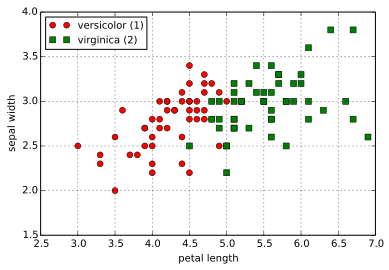

In [4]:
irisfig2d

# Classification
- Observation $x$
  - typically a real vector, $x\in \mathbb{R}^d$.
  - **Example**: a 2-dim vector containing the petal length and sepal width.
    - $x = \begin{bmatrix}\text{petal length}\\\text{sepal width}\end{bmatrix} = \begin{bmatrix}x_1\\x_2\end{bmatrix}$
- Class $y$
  - takes values from a set of possible class labels $\cal{Y}$.
  - **Example:** $\cal{Y}=\{\textrm{"versicolor"}, \textrm{"virginica"}\}$.
    - or equivalently as numbers, $\cal{Y}=\{1,2\}$.
- **Goal**: given an observation $x$, predict its class $y$.

# Probabilistic model
- Model _how_ the data is generated using probability distributions.
  - called a **generative model**.
- Generative model
  - The world has objects of various classes.
  - The observer measures features/observations from the objects.
  - Each class of objects has a particular distribution of features.

# Classes 
- possible classes are $\cal{Y}$
  - for example, ${\cal Y}=\{\textrm{"versicolor"}, \textrm{"virginica"}\}$.
    - or more generally, ${\cal Y}=\{1,2\}$.
- in the world, the frequency that class $y$ occurs is given by the probability distribution $p(y)$.
  - $p(y)$ is called the **prior distribution**.

- **Example:**
  - $p(y=1) = 0.4$, $p(y=2) = 0.6$
  - "In the world of iris flowers, there are 40% that are Class 1 (versicolor) and 60% that are Class 2 (virginica)"

# Observer

- the observer measures feature vector $x$
  - the value of the features _depend_ on the class.
- the observation is drawn according to the distribution $p(x|y)$.
  - $p(x|y)$ is called the **class conditional distribution**
    - "probability of observing a particular feature vector $x$ given the object is class $y$"

In [5]:
# fit Gaussians to dim-2
p1 = stats.norm.fit(data[0][:,2])
p2 = stats.norm.fit(data[1][:,2])
print p1
print p2

(4.2599999999999998, 0.46518813398452041)
(5.5519999999999996, 0.54634787452684408)


In [6]:
# create Gaussian class conditionals
ccond = [ stats.norm(loc=4.26, scale=0.465),   # class 1 (versicolor)
          stats.norm(loc=5.55, scale=0.546) ]  # class 2 (virginica)

xr = arange(2.5,7,0.01)
iris1dccd = plt.figure(figsize=(9,3))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(xr, ccond[i].pdf(xr), lines[i])       # plot pdf and data
    plt.plot(data[i][:,2], 0-0.1*random.random(data[i].shape[0]), markers[i], markersize=3)
    plt.ylabel('likelihood'); plt.xlabel("x (" + featnames[0] + ")")
    plt.title('p(x|y=' + str(i+1) + ')')
    plt.axis([2.5, 7, -0.099, 1]); plt.grid(True)
plt.close()

  - **Example:** class conditionals for feature "petal length"
    - assume they are Gaussian

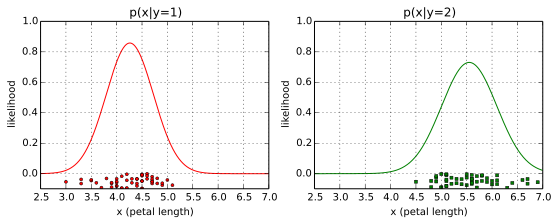

In [7]:
iris1dccd

# Bayesian Decision Rule
- The Bayesian decision rule (BDR) makes the optimal decisions on problems involving probability (uncertainty).
  - minimizes the _probability of making a prediction error_.
- **Bayes Classifier**
  - Given observation $x$, pick the class $c$ with the _largest posterior probability_, $p(y=c|x)$.
  - **Example:**
    - if $p(y=1|x) > p(y=2|x)$, then choose Class 1
    - if $p(y=1|x) < p(y=2|x)$, then choose Class 2

- Problem: we don't have $p(y|x)$!
  - we only have $p(y)$ and $p(x|y)$.

# Bayes' Rule
- The posterior probability can be calculated using Bayes' rule:
$$p(y|x) = \frac{p(x|y)p(y)}{p(x)}$$
  - The denominator is the probability of $x$:
    - $p(x) = \sum_{y\in {\cal Y}} p(x|y)p(y)$
  - The denominator makes $p(y|x)$ sum to 1.

- Bayes' rule: $$p(y|x) = \frac{p(x|y)p(y)}{p(x|y=1)p(y=1) + p(x|y=2)p(y=2)}$$

- **Example**: 

In [8]:
# calculate posteriors for each x
px = ccond[0].pdf(xr) + ccond[1].pdf(xr)  # probability of x
post = [ ccond[0].pdf(xr) / px,           # posterior for class 1
         ccond[1].pdf(xr) / px  ]         # posterior for class 2

# calculate prior
pr = array([count_nonzero(inds[0]), count_nonzero(inds[1])])
pr = pr / float(sum(pr))

iris1dpost = plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
a1, = plt.plot(xr, ccond[0].pdf(xr), 'r-')
a2, = plt.plot(xr, ccond[1].pdf(xr), 'g-')
plt.ylabel('likelihood'); plt.xlabel("x (" +featnames[0] + ")")
plt.title('class conditional p(x|y)')
plt.legend((a1,a2), classes, 0, framealpha=1, fontsize='medium')
plt.axis([2.5, 7, 0, 1.05]); plt.grid(True)

plt.subplot(1,2,2)
a3, = plt.plot(xr, post[0], 'r-')
a4, = plt.plot(xr, post[1], 'g-')
plt.ylabel('probability'); plt.xlabel("x (" +featnames[0] + ")")
plt.axis([2.5, 7, 0, 1.2]); plt.grid(True)
plt.title('posterior p(y|x)');
plt.legend((a3,a4), ("p(y=1|x)", "p(y=2|x)"), 0, framealpha=1, fontsize='medium')
plt.close()


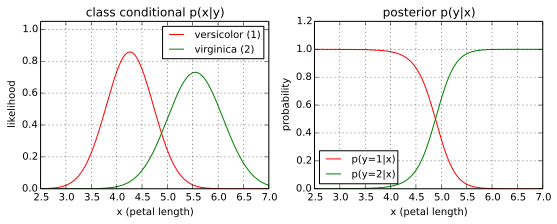

In [9]:
iris1dpost

- The _decision boundary_ is where the two posterior probabilites are equal
  - $p(y=1|x) = p(y=2|x)$

In [10]:
# find the index of the midpoint
midind = sum(post[0]>post[1])
midx   = 0.5*(xr[midind-1]+xr[midind])

iris1dpost2 = plt.figure()
a1, = plt.plot(xr, post[0], 'r-')
a2, = plt.plot(xr, post[1], 'g-')
a3, = plt.plot([midx, midx], [0,1.2], 'k--')
plt.ylabel('probability'); plt.xlabel("x (" +featnames[0] + ")")
plt.axis([2.5, 7, 0, 1.2]); plt.grid(True)
plt.title('posterior p(y|x)');
plt.arrow(midx-0.1,1.05,-0.8,0,width=0.002)
plt.arrow(midx+0.1,1.05,0.8,0,width=0.002)
plt.text(midx+0.1,1.10,"Class 2")
plt.text(midx-0.1,1.10,"Class 1", horizontalalignment='right')
plt.legend((a1,a2,a3), ("p(y=1|x)", "p(y=2|x)") + ('decision boundary',), 0, framealpha=1, fontsize='medium')
plt.close()

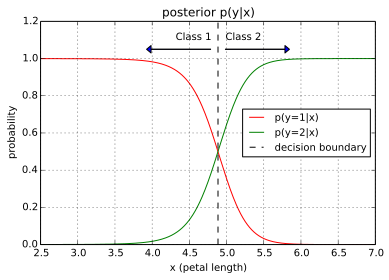

In [11]:
iris1dpost2

# Bayes rule revisited
- Bayes' rule: $p(y|x) = \frac{p(x|y)p(y)}{p(x)}$
- Note that the denominator is the same for each class $y$.
  - hence, we can compare just the numerators $p(x|y)p(y)$.
  - This also called the _joint likelihood_ of the observation and class
    - $p(x,y) = p(x|y)p(y)$

- **Example:**
  - BDR using joint likelihoods:
    - if $p(x|y=1)p(y=1)$ $>$ $p(x|y=2)p(y=2)$, then choose Class 1
    - otherwise, choose Class 2

In [12]:
# calculate joint likelihood for each x
iris1djoint = plt.figure(figsize=(9,3))

plt.subplot(1,2,1)
a1, = plt.plot(xr, post[0], 'r-')
a2, = plt.plot(xr, post[1], 'g-')
a3, = plt.plot([midx, midx], [0,1.2], 'k--')
plt.ylabel('probability'); plt.xlabel("x (" +featnames[0] + ")")
plt.axis([2.5, 7, 0, 1.05]); plt.grid(True)
plt.title('posterior p(y|x)');
plt.legend((a1,a2), ("p(y=1|x)", "p(y=2|x)"), 0, framealpha=1, fontsize='medium')
plt.subplot(1,2,2)
a4, = plt.plot(xr, ccond[0].pdf(xr)*pr[0], 'r-')
a5, = plt.plot(xr, ccond[1].pdf(xr)*pr[1], 'g-')
a6, = plt.plot([midx, midx], [0,1.2], 'k--')
plt.ylabel('likelihood'); plt.xlabel("x (" +featnames[0] + ")")
plt.title('joint likelihood p(x,y)')
plt.legend((a4,a5), ("p(x,y=1)", "p(x,y=2)"), 0, framealpha=1, fontsize='medium')
plt.axis([2.5, 7, 0, .55]); plt.grid(True)
plt.close()

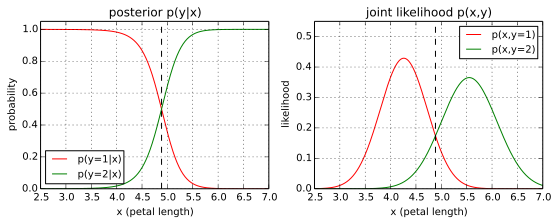

In [13]:
iris1djoint

- Can also apply a monotonic increasing function (like $\log$) and do the comparison.
  - Using log likelihoods:
    - $\log p(x|y=1)+\log p(y=1)$ $>$ $\log p(x|y=2)+\log p(y=2)$
  - This is more numerically stable when the likelihoods are small.

In [14]:
# show joint likelihood and LL plots
iris1dLL = plt.figure(figsize=(9,3))

plt.subplot(1,2,1)
a4, = plt.plot(xr, ccond[0].pdf(xr)*pr[0], 'r-')
a5, = plt.plot(xr, ccond[1].pdf(xr)*pr[1], 'g-')
a6, = plt.plot([midx, midx], [0,1.2], 'k--')
plt.ylabel('likelihood'); plt.xlabel("x (" +featnames[0] + ")")
plt.title('joint likelihood p(x,y)')
plt.legend((a4,a5), ("p(x,y=1)", "p(x,y=2)"), 0, framealpha=1, fontsize='medium')
plt.axis([2.5, 7, 0, .55]); plt.grid(True)

plt.subplot(1,2,2)
a4, = plt.plot(xr, ccond[0].logpdf(xr) + log(pr[0]), 'r-')
a5, = plt.plot(xr, ccond[1].logpdf(xr) + log(pr[1]), 'g-')
a6, = plt.plot([midx, midx], [-20,5], 'k--')
plt.ylabel('log-likelihood'); plt.xlabel("x (" +featnames[0] + ")")
plt.title('log p(x,y)')
plt.axis([2.5, 7, -20, 0]); plt.grid(True)
plt.legend((a4,a5), ("log p(x,y=1)", "log p(x,y=2)"), 0, framealpha=1, fontsize='medium')
plt.close()

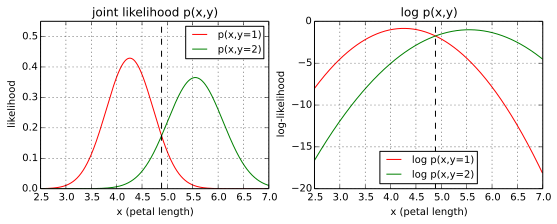

In [15]:
iris1dLL

# Parameter Estimation
- So far we have assumed that we know the probability distributions $p(x|y)$ and $p(y)$
- How do we get $p(x|y)$ and $p(y)$?
  - Make assumptions about the distribution form of the class-condtionals and the prior.
  - Learn the parameters of each distribution from training data.

# Estimating the Class Conditionals
- For each class $y=c$:
  1. Select a distribution form for $p(x|y=c)$.
    - call its parameters $\theta_c$.
    - For example, $p(x|y=c)$ is Gaussian with parameters $\theta_c=(\mu_c,\sigma_c^2)$.
  2. Collect training samples ${\cal D}_c = \{x_i\}_{i=1}^N$ corresponding to class $y=c$
  3. Estimate the parameters $\theta_c$ using maximum likelihood estimation (MLE) on ${\cal D}_c$.

# Maximum likelihood estimation (MLE)
- pick the $\theta$ that maximizes the log-likelihood of the training samples $\{x_i\}_{i=1}^N$:
  - $\hat{\theta} = \arg\max_\theta \sum_{i=1}^N \log p(x_i|y)$
- **Example:** 
  - Gaussian distribution: $p(x|y) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(x-\mu)^2}$
    - Parameters are mean $\mu$, variance $\sigma^2$.
  - MLE for parameters:
    - sample mean:     $\mu = \frac{1}{N}\sum_{i=1}^N x_i$
    - sample variance: $\sigma^2 = \frac{1}{N}\sum_{i=1}^N (x_i-\mu)^2$
  

- **Example:** MLE for Gaussians

In [16]:
# show mean/stddev example
for i in range(0,2):
    ax = iris1dccd.add_subplot(1,2,i+1)
    mymean = ccond[i].mean()
    mystd  = ccond[i].std()
    tmpval = ccond[i].pdf(mymean-mystd)
    ax.plot([mymean]*2, [0, 1], 'k--')
    ax.text(mymean+0.1, 0.9, 'mean $\mu_'+str(i+1)+'$', horizontalalignment='left')
    ax.annotate("", xy=(mymean-mystd, tmpval), xytext=(mymean+mystd, tmpval), 
                arrowprops={'arrowstyle':'<->', 'shrinkA':0, 'shrinkB':0})
    ax.text(mymean+0.1, tmpval-0.02, '$2\sigma_' + str(i+1) + '$', verticalalignment='top')
    ax.text(2.7,0.95,"$\mu_"+str(i+1)+"=" + str(mymean) + "$\n" + 
                     "$\sigma_"+str(i+1)+"=" + str(mystd) + "$", verticalalignment='top', 
             alpha=1, backgroundcolor='w', bbox={'linewidth':0.5})

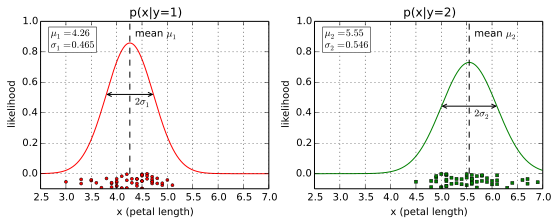

In [17]:
iris1dccd

# Binomial Distribution
- For 2-class problem, the prior distribution $p(y)$ is a binomial distribution.
  - $p(y=1) = \pi_1$, $p(y=2) = \pi_2$.
  - where $\pi_1+\pi_2=1$.
- MLE parameters:
  - Training set has $N$ samples:
    - $N_1$ samples from Class 1, $N_2$ samples from Class 2.
  - Parameter estimate is the sample frequency:
    - $p(y=1) = \frac{N_1}{N}$, $p(y=2) = \frac{N_2}{N}$.
- **Example:** 
  - 49 examples from Class 1, and 51 from Class 2.
  - $p(y=1) = 0.49$, $p(y=2)=0.51$.

# Bayes Classifier Summary
- **Training:**
  1. Collect training data from each class. 
  2. For each class $c$, estimate the class conditional densities $p(x|y=c)$:
    1. select a form of the distribution (e.g. Gaussian).
    2. estimate its parameters with MLE.
  3. Estimate the class priors $p(y)$ using MLE.
- **Classification:**
  1. Given a new sample $x^*$, calculate the likelihood $p(x^*|y=c)$ for each class $c$.
  2. Pick the class $c$ with largest posterior probability $p(y=c|x)$.
    - (equivalently, use $p(x|y=c)p(y=c)$ or $\log p(x|y=c)+\log p(y=c)$)